# **End to End Project**
**Nombre:** Iván Avena Caro  
**Fecha:** 5 de September de 2024  
**Materia:** Machine Learning  

**Descripción:** Este proyecto tiene como objetivo analizar un conjunto de datos, preparar los datos para algoritmos de aprendizaje automático, entrenar un modelo de regresión lineal y desplegar la solución usando Streamlit.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy import stats
import joblib
import os

#cargar datos
df = pd.read_csv('/content/housing - copia - copia (4).csv')

In [2]:
#ver primeras filas
print(df.head())

#ver filas y columnas
print ("Filas Columnas")
df.shape

   Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0           0    -122.23     37.88                41.0        880.0   
1           1    -122.22     37.86                21.0       7099.0   
2           2    -122.24     37.85                52.0       1467.0   
3           3    -122.25     37.85                52.0       1274.0   
4           4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEA

(20640, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

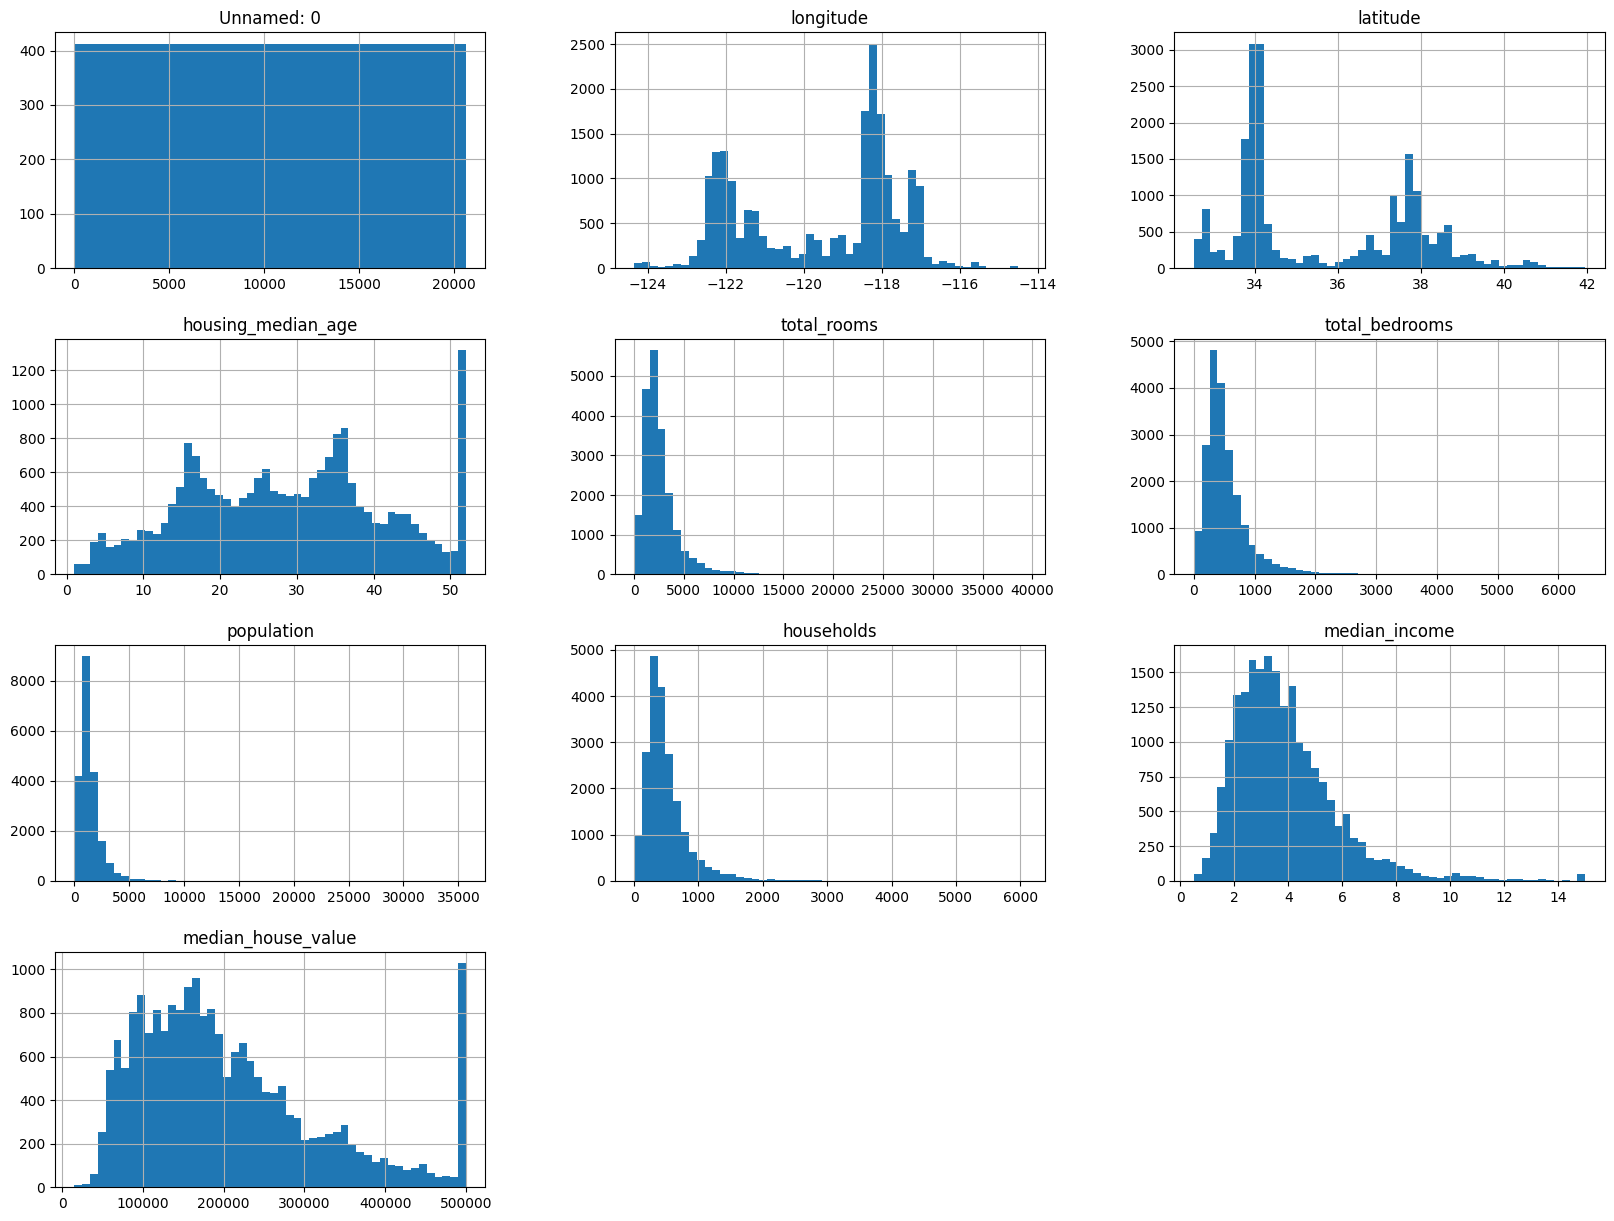

In [6]:
df.hist(bins=50, figsize=(20,15))

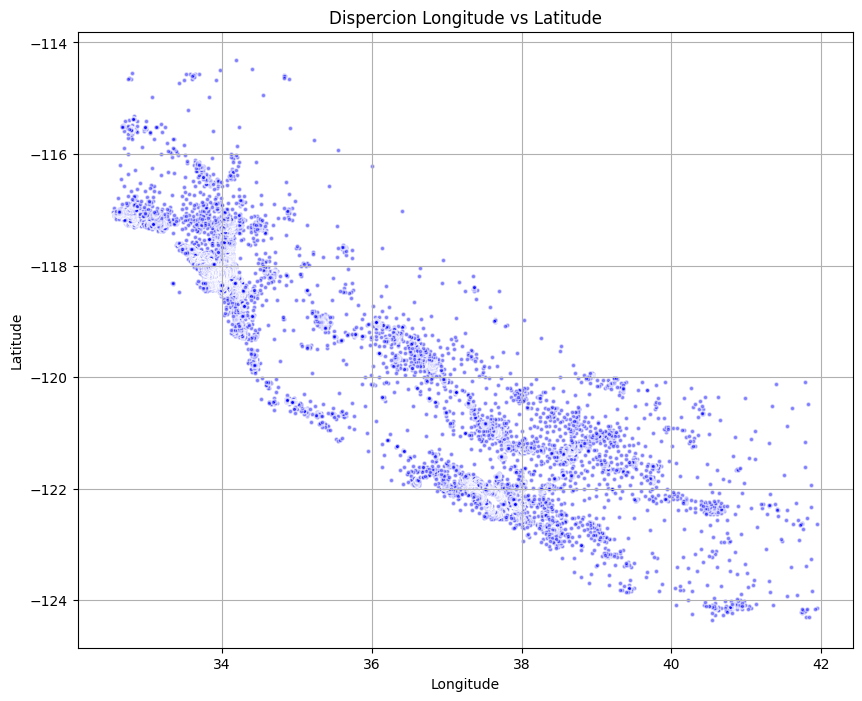

In [7]:
# Crear el diagrama de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(df['latitude'], df['longitude'], alpha=0.5, c='blue', edgecolors='w', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dispercion Longitude vs Latitude')
plt.grid(True)

# Mostrar el gráfico
plt.show()

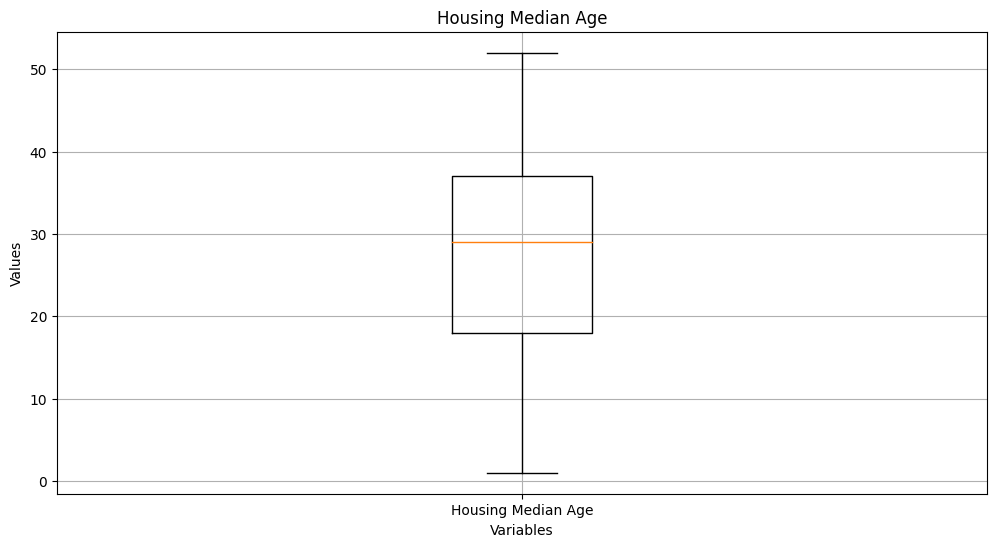

In [8]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 6))

# Crear una lista con las columnas para el diagrama de caja
data = [df['housing_median_age'].dropna()]

plt.boxplot(data, labels=[ 'Housing Median Age'])

plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Housing Median Age')
plt.grid(True)

# Mostrar el gráfico
plt.show()

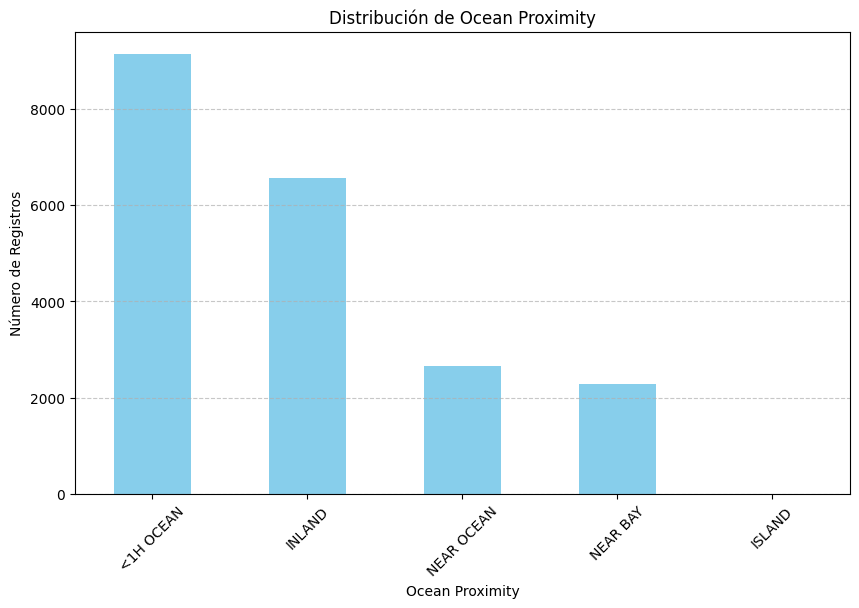

In [9]:
# Contar las ocurrencias de cada valor en la columna 'ocean_proximity'
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
ocean_proximity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

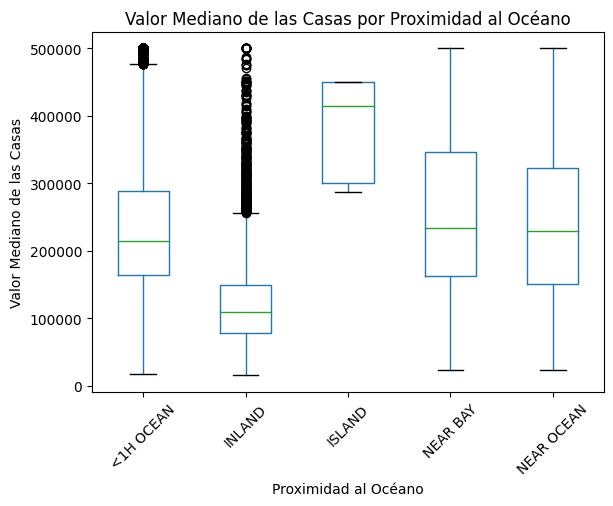

In [10]:
plt.figure(figsize=(12, 8))
df.boxplot(column='median_house_value', by='ocean_proximity', grid=False)
plt.title('Valor Mediano de las Casas por Proximidad al Océano')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Mediano de las Casas')
plt.xticks(rotation=45)
plt.show()

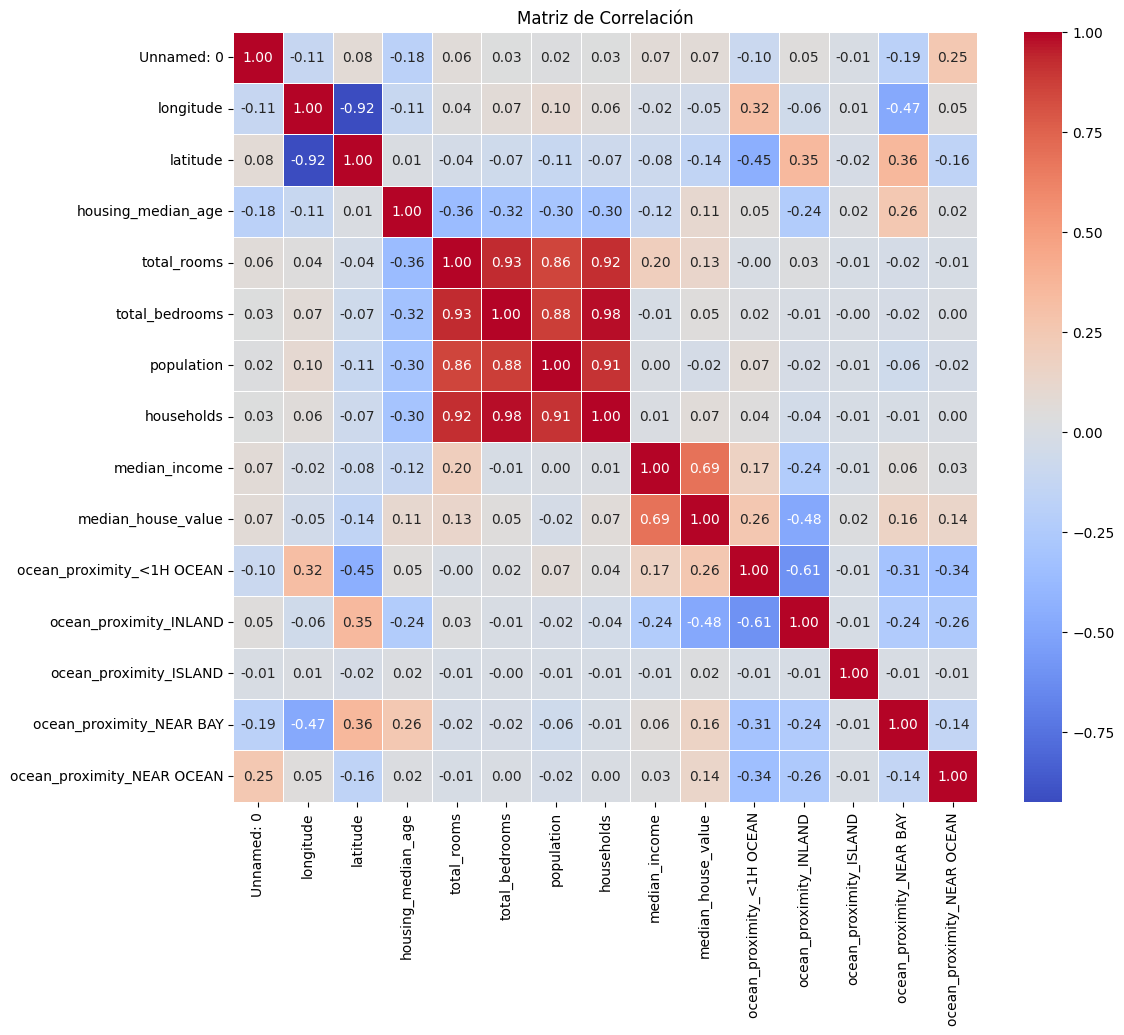

In [11]:
# Convertir la columna categórica 'ocean_proximity' a variables dummy (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

<Axes: >

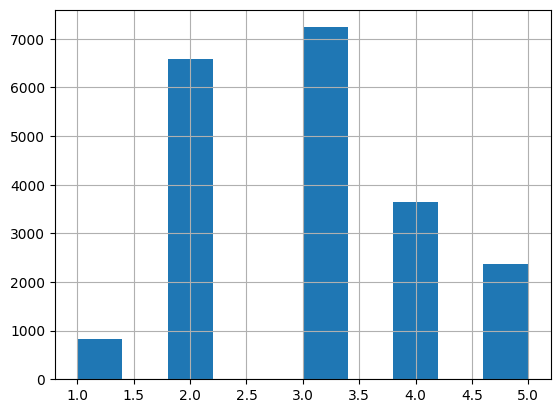

In [12]:
# Crear una nueva columna 'income_cat' basada en 'median_income'
df['income_cat'] = pd.cut(df['median_income'],
                         bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                         labels=[1, 2, 3, 4, 5])
df['income_cat'].hist()


In [13]:
# Definir la partición estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Realizar la división estratificada
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set['income_cat'].value_counts()/len(strat_test_set)


,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [14]:
#Remover atributo income_cat
for set_ in(strat_train_set,strat_test_set):
  set_.drop('income_cat',axis=1, inplace=True)

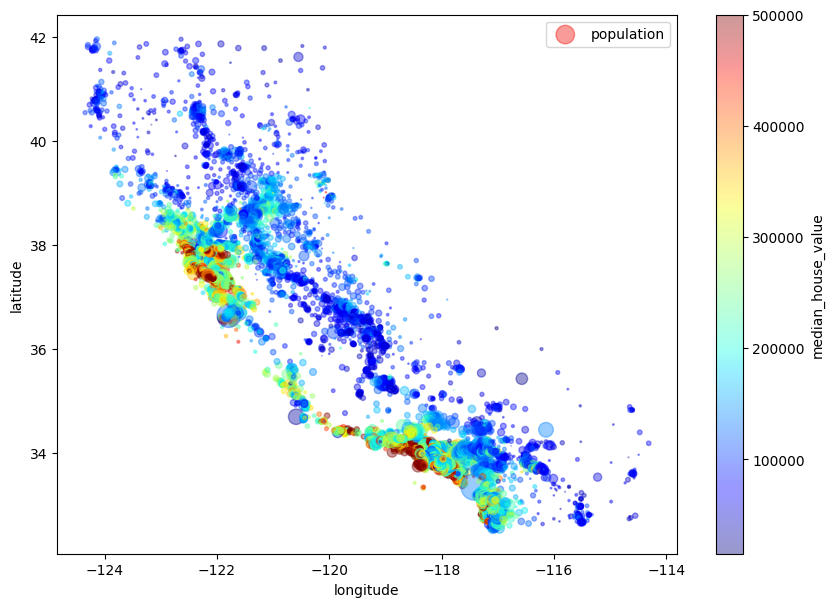

In [15]:
#Radio representa la población y el color el precio
df.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4,
        s=df["population"]/100, label="population",figsize=(10,7),
        c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

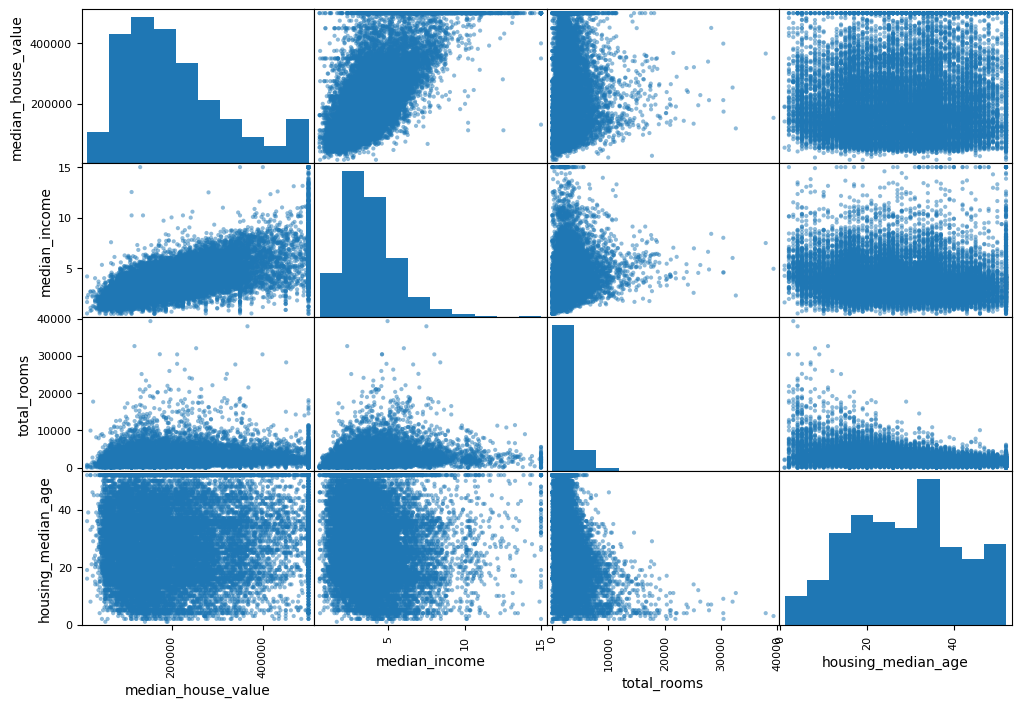

In [16]:
#Matriz de disperción
from pandas.plotting import scatter_matrix

atributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(df[atributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

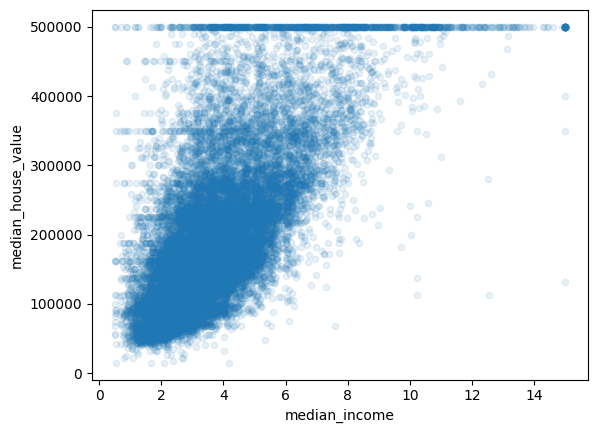

In [17]:
#median_income vs median:house_value
df.plot(kind="scatter", x= 'median_income', y='median_house_value', alpha=0.1)

In [18]:
#Crear nuevos atributos
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

# Seleccionar solo columnas numéricas para calcular la correlación
numeric_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Mostrar las correlaciones con 'median_house_value'
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
Unnamed: 0                  0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [19]:
#Volver a un conjunto de entrenamiento limpio
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_test_set["median_house_value"].copy()

In [20]:
#Reemplazar los valores faltantes de cada atributo con la mediana de ese atrinuto
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy="median")
#Crear una copia sin ocean proximity
df_num = df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)
imputer.statistics_
df_num.median().values

array([ 1.03395e+04, -1.18510e+02,  3.42600e+01,  2.90000e+01,
        2.11900e+03,  4.33000e+02,  1.16400e+03,  4.08000e+02,
        3.54155e+00])

In [21]:
#Transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas aprendidas
X = imputer.transform(df_num)
#El resultado es una matriz de numpy con las caracteristicas transformadas
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)

In [22]:
#Ver primeras 10 instancias de ocean proximity
df_cat = df[["ocean_proximity"]]
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [23]:
# Seleccionar la columna categórica
df_cat = df[['ocean_proximity']]

# Crear un codificador one-hot
cat_encoder = OneHotEncoder(sparse=False)  # Usar sparse=False para obtener un array en lugar de una matriz dispersa

# Ajustar y transformar los datos
df_cat_1hot = cat_encoder.fit_transform(df_cat)

# Convertir a un DataFrame con nombres de columnas
df_cat_1hot_df = pd.DataFrame(df_cat_1hot, columns=cat_encoder.get_feature_names_out(['ocean_proximity']))

print(df_cat_1hot_df)

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            0.0                     0.0   
2                            0.0                     1.0   
3                            0.0                     0.0   
4                            1.0                     0.0   
...                          ...                     ...   
16507                        1.0                     0.0   
16508                        0.0                     1.0   
16509                        1.0                     0.0   
16510                        1.0                     0.0   
16511                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0              

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [25]:
# Definición de CombinedAttributesAdder
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attribs = attr_adder.transform(df.values)

In [26]:

# Volver a un conjunto de entrenamiento limpio
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

In [27]:
# Crear el pipeline para datos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

df_num_tr = num_pipeline.fit_transform(df_num)

# Crear el transformador para todas las columnas
num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Preparar el conjunto de entrenamiento
df_prepared = full_pipeline.fit_transform(df)

# Definir el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68336.29740487998

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Configurar GridSearchCV con LinearRegression
param_grid = [
    {'fit_intercept': [True, False]}  # Estos son los parámetros válidos para LinearRegression
]

lin_reg = LinearRegression()

grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Ajustar el modelo
grid_search.fit(df_prepared, df_labels)

# Mostrar los mejores parámetros encontrados
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'fit_intercept': True}
Best score found:  -4711910426.378889


In [29]:

# Guardar el pipeline y el modelo
directory = 'model_files'
if not os.path.exists(directory):
    os.makedirs(directory)

# Guardar el pipeline
pipeline_path = os.path.join(directory, 'full_pipeline.pkl')
joblib.dump(full_pipeline, pipeline_path)
print(f"Pipeline guardado en: {pipeline_path}")

# Guardar el modelo de regresión
model_path = os.path.join(directory, 'lin_reg_model.pkl')
joblib.dump(grid_search.best_estimator_, model_path)
print(f"Modelo guardado en: {model_path}")

# Evaluar en el conjunto de prueba
final_model = grid_search.best_estimator_

# Asegúrate de que strat_test_set esté definido correctamente
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE: {final_rmse}")

Pipeline guardado en: model_files/full_pipeline.pkl
Modelo guardado en: model_files/lin_reg_model.pkl
Final RMSE: 66437.65214498731


In [33]:
# Guardar el modelo en el entorno de Colab como .joblib
model_path = 'lin_reg.joblib'  # Guardar con la extensión .joblib
joblib.dump(lin_reg, model_path)
print(f"Modelo guardado en: {model_path}")

Modelo guardado en: lin_reg.joblib


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Supongamos que ya tienes y_test y final_predictions de tu tarea de regresión

# Calcular MSE
final_mse = mean_squared_error(y_test, final_predictions)
print(f"Final MSE: {final_mse}")

# Calcular RMSE
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE: {final_rmse}")

# Calcular MAE
final_mae = mean_absolute_error(y_test, final_predictions)
print(f"Final MAE: {final_mae}")

# Calcular R²
final_r2 = r2_score(y_test, final_predictions)
print(f"Final R²: {final_r2}")

Final MSE: 4413961622.538338
Final RMSE: 66437.65214498731
Final MAE: 49077.522043246354
Final R²: 0.6613281077762928
